# MEL2040 Project
Data-Driven Analysis of Fluid Flows


---


Rutam S. Rajhansa, Ojasvi Pandey



Mechanical Engineering, IITJ


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Proper Orthogonal Decomposition (30 marks)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def preprocess_frame(frame, scale_factor=0.5):
    # Check if the frame is already grayscale
    if len(frame.shape) == 2:
        downsampled_frame = frame
    else:
        # If the frame is color, downsample and convert to grayscale
        height, width = frame.shape[:2]
        new_height = int(height * scale_factor)
        new_width = int(width * scale_factor)
        downsampled_frame = cv2.resize(frame, (new_width, new_height))
        downsampled_frame = cv2.cvtColor(downsampled_frame, cv2.COLOR_BGR2GRAY)

    return downsampled_frame


def images_to_stack(image_folder):
    images = []
    # Initialize dimensions to None
    common_height = None
    common_width = None

    for i in range(751):  # Adjust the range to capture all images
        img = cv2.imread(f"{image_folder}/frame_{i}.jpg")
        if img is not None:
            # Convert image to grayscale and resize if needed
            img = preprocess_frame(img)
            if common_height is None or common_width is None:
                common_height, common_width = img.shape
            else:
                img = cv2.resize(img, (common_width, common_height))
            images.append(img)
            print(f"Image {i+1} shape: {img.shape}")
        else:
            break
    return np.array(images)

def print_first_10_images(video_path, output_folder):
    video_capture = cv2.VideoCapture(video_path)
    success, frame = video_capture.read()
    count = 0

    while success and count < 10:
        processed_frame = frame
        plt.imshow(processed_frame[:, :, ::-1])
        plt.title(f"Image {count+1}")
        plt.show()

        count += 1
        success, frame = video_capture.read()

    video_capture.release()

def video_to_images(video_path, output_folder, frame_skip=10, max_frames=None):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    video_capture = cv2.VideoCapture(video_path)
    success, frame = video_capture.read()
    count = 0
    frame_number = 0

    while success:
        if count % frame_skip == 0:
            processed_frame = preprocess_frame(frame)

            cv2.imwrite(f"{output_folder}/frame_{frame_number}.jpg", processed_frame)
            frame_number += 1

            if max_frames and frame_number >= max_frames:
                break

        success, frame = video_capture.read()
        count += 1

    video_capture.release()
    print("Total number of images extracted:", frame_number)

def compute_pod(image_stack):
    mean_image = np.mean(image_stack, axis=0)
    centered_images = image_stack - mean_image

    if centered_images.size == 0:
        raise ValueError("Error: No images provided for POD computation.")

    n_images = centered_images.shape[0]
    flattened_images = centered_images.reshape(n_images, -1)

    U, S, Vt = np.linalg.svd(flattened_images, full_matrices=False)

    return U, S, mean_image

# Example usage:
video_path = "/content/drive/MyDrive/Colab Notebooks/dataset/3CYL_Flow.mp4"
output_folder = "/content/drive/MyDrive/Colab Notebooks/dataset/output_folder/"

# Convert video to images (extract all frames)
video_to_images(video_path, output_folder, frame_skip=1, max_frames=None)

# Load images into a stack
image_stack = images_to_stack(output_folder)

# Preprocess images by downsampling and converting to grayscale
preprocessed_images = [preprocess_frame(frame) for frame in image_stack]
preprocessed_image_stack = np.array(preprocessed_images)

# Print the shape of the preprocessed image stack
print("Shape of preprocessed image stack:", preprocessed_image_stack.shape)

# Apply POD using SVD on the preprocessed image stack
U, S, mean_image = compute_pod(preprocessed_image_stack)


Total number of images extracted: 751
Image 1 shape: (177, 389)
Image 2 shape: (177, 389)
Image 3 shape: (177, 389)
Image 4 shape: (177, 389)
Image 5 shape: (177, 389)
Image 6 shape: (177, 389)
Image 7 shape: (177, 389)
Image 8 shape: (177, 389)
Image 9 shape: (177, 389)
Image 10 shape: (177, 389)
Image 11 shape: (177, 389)
Image 12 shape: (177, 389)
Image 13 shape: (177, 389)
Image 14 shape: (177, 389)
Image 15 shape: (177, 389)
Image 16 shape: (177, 389)
Image 17 shape: (177, 389)
Image 18 shape: (177, 389)
Image 19 shape: (177, 389)
Image 20 shape: (177, 389)
Image 21 shape: (177, 389)
Image 22 shape: (177, 389)
Image 23 shape: (177, 389)
Image 24 shape: (177, 389)
Image 25 shape: (177, 389)
Image 26 shape: (177, 389)
Image 27 shape: (177, 389)
Image 28 shape: (177, 389)
Image 29 shape: (177, 389)
Image 30 shape: (177, 389)
Image 31 shape: (177, 389)
Image 32 shape: (177, 389)
Image 33 shape: (177, 389)
Image 34 shape: (177, 389)
Image 35 shape: (177, 389)
Image 36 shape: (177, 389)

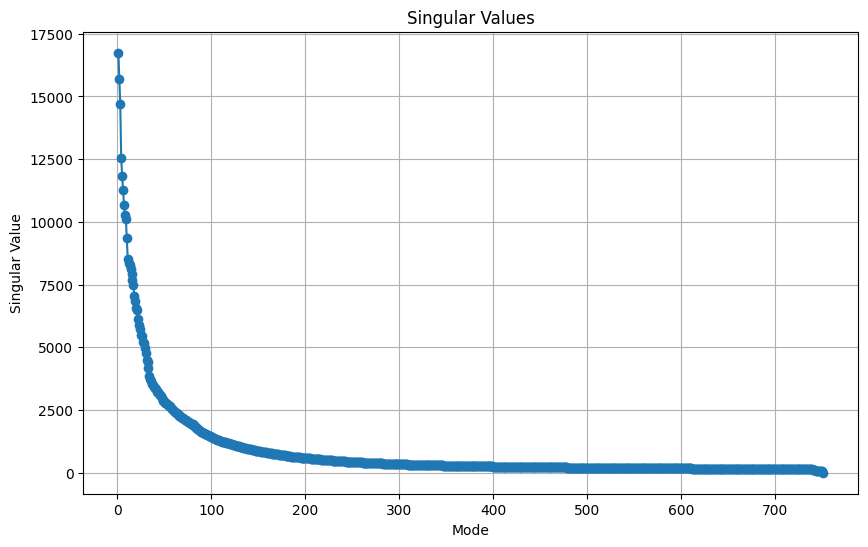

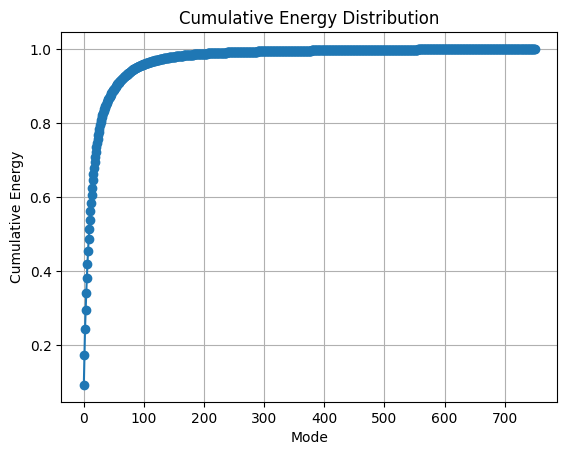

Top 10 modes corresponding to the highest energy states:
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
singular_values = S

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(singular_values) + 1), singular_values, marker='o', linestyle='-')
plt.title('Singular Values')
plt.xlabel('Mode')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()


# Compute the cumulative energy of each mode
energy = S ** 2 / np.sum(S ** 2)
cumulative_energy = np.cumsum(energy)

# Plot the cumulative energy
plt.plot(cumulative_energy, marker='o', linestyle='-')
plt.title('Cumulative Energy Distribution')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.grid(True)
plt.show()

# Report the modes corresponding to the top 10 energy states
top_10_modes = np.argsort(energy)[::-1][:10]
print("Top 10 modes corresponding to the highest energy states:")
print(top_10_modes)


In [ ]:
image_stack.shape

(751, 177, 389)

Significance of Nodes

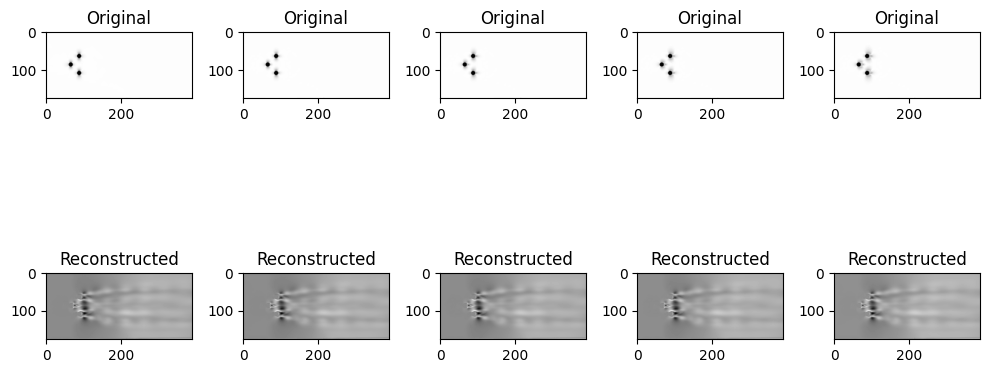

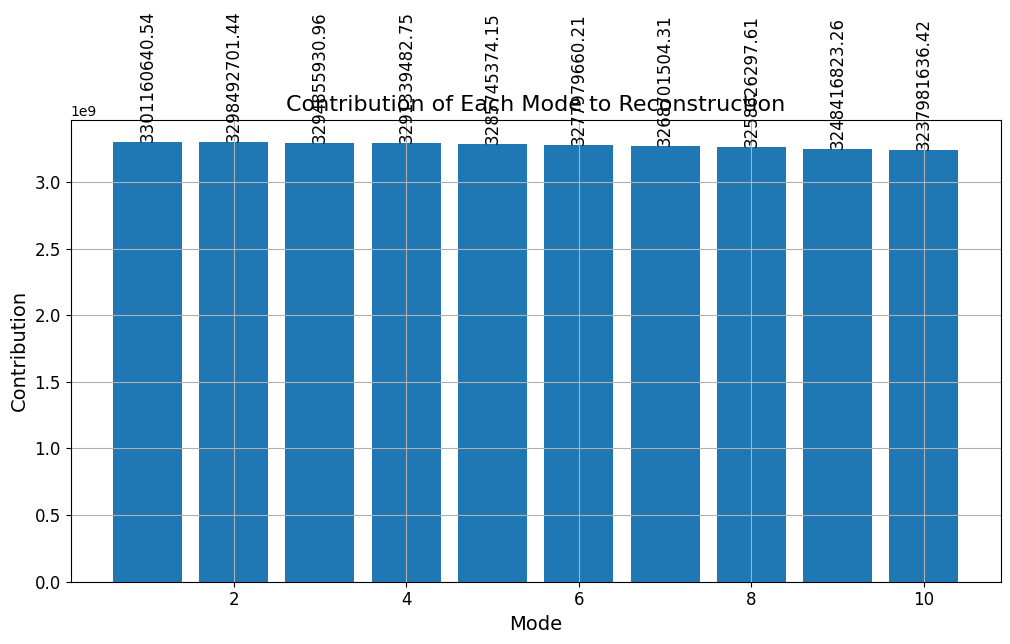

In [ ]:
# Number of top modes to consider for reconstruction
num_modes = 10

# Compute the top modes
top_modes = U[:, :num_modes]

# Reconstruct the images using the top modes
reconstructed_images = np.dot(top_modes, np.dot(top_modes.T, preprocessed_image_stack.reshape(preprocessed_image_stack.shape[0], -1))).reshape(preprocessed_image_stack.shape)

# Plot the original and reconstructed images for comparison
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(preprocessed_image_stack[i], cmap='gray')
    plt.title('Original')

    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title('Reconstructed')

plt.tight_layout()
plt.show()

# Compute the contribution of each mode to the reconstruction
mode_contributions = np.sum((preprocessed_image_stack.reshape(preprocessed_image_stack.shape[0], -1) - reconstructed_images.reshape(reconstructed_images.shape[0], -1)) ** 2, axis=1)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the contribution of each mode
plt.bar(np.arange(1, num_modes + 1), mode_contributions[:num_modes])
plt.title('Contribution of Each Mode to Reconstruction', fontsize=16)
plt.xlabel('Mode', fontsize=14)
plt.ylabel('Contribution', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Annotate each bar with its contribution value
for i, contribution in enumerate(mode_contributions[:num_modes]):
    plt.text(i + 1, contribution + 0.05, f'{contribution:.2f}', ha='center', va='bottom', rotation=90, fontsize=12)

plt.show()




# 4. Noise

Error processing frame_319.jpg: index 761 is out of bounds for axis 0 with size 354
Error processing frame_319.jpg: index 538 is out of bounds for axis 0 with size 354
Error processing frame_319.jpg: index 621 is out of bounds for axis 0 with size 354
Error processing frame_319.jpg: index 637 is out of bounds for axis 0 with size 354
Error processing frame_320.jpg: index 403 is out of bounds for axis 0 with size 354
Error processing frame_320.jpg: index 693 is out of bounds for axis 0 with size 354
Error processing frame_320.jpg: index 549 is out of bounds for axis 0 with size 354
Error processing frame_320.jpg: index 720 is out of bounds for axis 0 with size 354
Error processing frame_321.jpg: index 647 is out of bounds for axis 0 with size 354
Error processing frame_321.jpg: index 768 is out of bounds for axis 0 with size 354
Error processing frame_321.jpg: index 477 is out of bounds for axis 0 with size 354
Error processing frame_321.jpg: index 747 is out of bounds for axis 0 with s

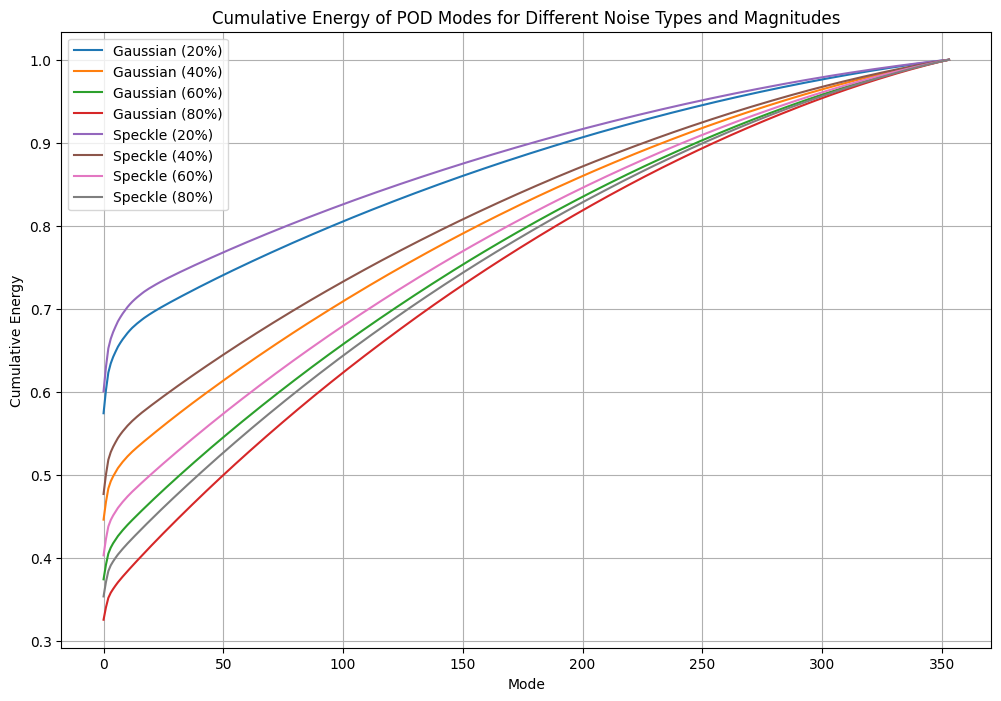

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Function to perform POD and compute singular values
def perform_pod(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)
    return S

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, magnitude):
    mean = 0
    std_dev = magnitude * 0.2 * 255  # Magnitude is given as a percentage of the maximum intensity (0-255)
    noisy_image = image + np.random.normal(mean, std_dev, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  # Clip values to valid intensity range
    return noisy_image

# Function to add salt and pepper noise to an image
def add_salt_and_pepper_noise(image, magnitude):
    noisy_image = np.copy(image)
    num_salt = np.ceil(magnitude * 0.01 * image.size)
    num_pepper = np.ceil(magnitude * 0.01 * image.size)

    # Add salt noise
    salt_coords = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords] = 255

    # Add pepper noise
    pepper_coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords] = 0

    return noisy_image

# Function to add speckle noise to an image
def add_speckle_noise(image, magnitude):
    noise = magnitude * 0.2 * np.random.randn(*image.shape)
    noisy_image = image + image * noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  # Clip values to valid intensity range
    return noisy_image

# Directory paths
input_folder = "/content/drive/MyDrive/Colab Notebooks/dataset/output_folder/"
output_folder = "/content/drive/MyDrive/Colab Notebooks/dataset/noisy_frames/"

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Magnitude levels of noise to add (20%, 40%, 60%, 80% of maximum intensity)
magnitudes = [0.2, 0.4, 0.6, 0.8]

# Lists to store cumulative energy data for different noise types
cumulative_energy_data = {
    'gaussian': [],
    'salt_and_pepper': [],
    'speckle': []
}

# Iterate through each frame in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        # Read the original image
        original_image = cv2.imread(os.path.join(input_folder, filename))

        # Perform POD on the original image
        S_original = perform_pod(original_image)

        # Add different types of noise at different magnitudes
        for noise_type in ['gaussian', 'salt_and_pepper', 'speckle']:
            for mag in magnitudes:
                try:
                    # Add noise to the original image
                    if noise_type == 'gaussian':
                        noisy_image = add_gaussian_noise(original_image, mag)
                    elif noise_type == 'salt_and_pepper':
                        noisy_image = add_salt_and_pepper_noise(original_image, mag)
                    elif noise_type == 'speckle':
                        noisy_image = add_speckle_noise(original_image, mag)

                    # Perform POD on the noisy image
                    S_noisy = perform_pod(noisy_image)

                    # Compute cumulative energy of the modes
                    cumulative_energy_noisy = np.cumsum(S_noisy) / np.sum(S_noisy)
                    cumulative_energy_data[noise_type].append(cumulative_energy_noisy)
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

# Plot cumulative energy for different noise types and magnitudes
plt.figure(figsize=(12, 8))
for noise_type, cumulative_energy_list in cumulative_energy_data.items():
    for mag, cumulative_energy in zip(magnitudes, cumulative_energy_list):
        plt.plot(cumulative_energy, label=f'{noise_type.capitalize()} ({int(mag*100)}%)')
plt.title('Cumulative Energy of POD Modes for Different Noise Types and Magnitudes')
plt.xlabel('Mode')
plt.ylabel('Cumulative Energy')
plt.legend()
plt.grid(True)
plt.show()


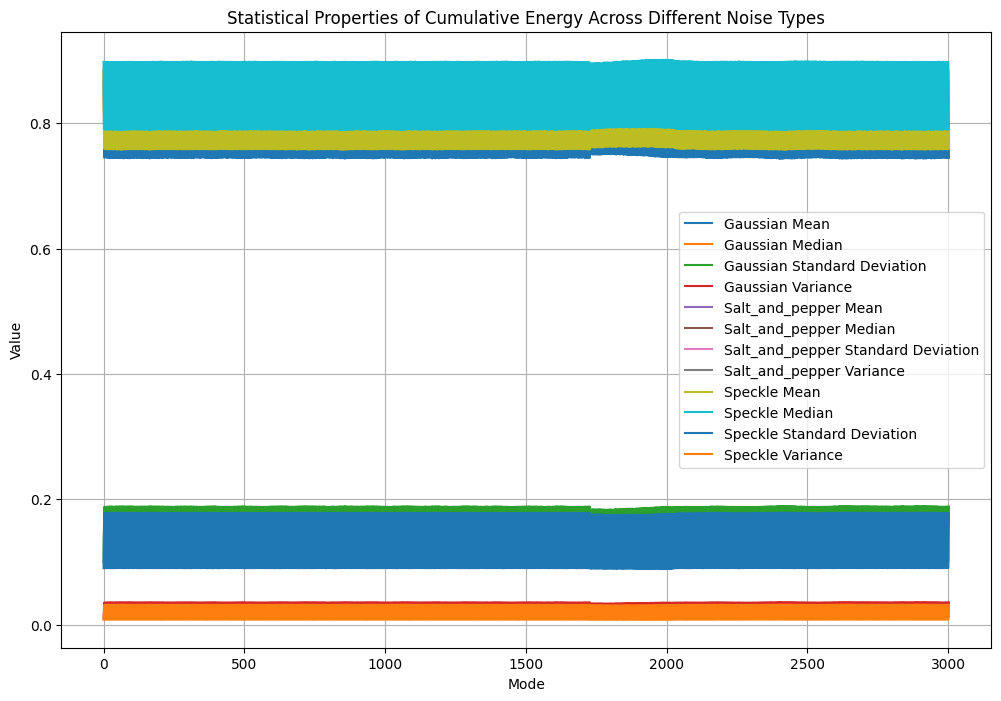

In [ ]:
# Compute statistical properties of singular values
def compute_statistical_properties(S):
    mean = np.mean(S)
    median = np.median(S)
    std_dev = np.std(S)
    variance = np.var(S)
    return mean, median, std_dev, variance

# Lists to store statistical properties for different noise types
statistical_properties_data = {
    'gaussian': {'mean': [], 'median': [], 'std_dev': [], 'variance': []},
    'salt_and_pepper': {'mean': [], 'median': [], 'std_dev': [], 'variance': []},
    'speckle': {'mean': [], 'median': [], 'std_dev': [], 'variance': []}
}

# Iterate through each noise type
for noise_type, cumulative_energy_list in cumulative_energy_data.items():
    for cumulative_energy in cumulative_energy_list:
        # Compute statistical properties for each noise type
        mean, median, std_dev, variance = compute_statistical_properties(cumulative_energy)
        statistical_properties_data[noise_type]['mean'].append(mean)
        statistical_properties_data[noise_type]['median'].append(median)
        statistical_properties_data[noise_type]['std_dev'].append(std_dev)
        statistical_properties_data[noise_type]['variance'].append(variance)

# Plot statistical properties for different noise types
plt.figure(figsize=(12, 8))
for noise_type, properties in statistical_properties_data.items():
    plt.plot(properties['mean'], label=f'{noise_type.capitalize()} Mean')
    plt.plot(properties['median'], label=f'{noise_type.capitalize()} Median')
    plt.plot(properties['std_dev'], label=f'{noise_type.capitalize()} Standard Deviation')
    plt.plot(properties['variance'], label=f'{noise_type.capitalize()} Variance')
plt.title('Statistical Properties of Cumulative Energy Across Different Noise Types')
plt.xlabel('Mode')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# 5. **Super Resolving**

Epoch 1/10
5/5 [==============================] - 240s 48s/step - loss: 0.0908 - val_loss: 0.0389
Epoch 2/10
5/5 [==============================] - 237s 48s/step - loss: 0.0166 - val_loss: 0.0052
Epoch 3/10
5/5 [==============================] - 249s 50s/step - loss: 0.0072 - val_loss: 0.0036
Epoch 4/10
5/5 [==============================] - 236s 48s/step - loss: 0.0052 - val_loss: 0.0038
Epoch 5/10
5/5 [==============================] - 243s 50s/step - loss: 0.0044 - val_loss: 0.0027
Epoch 6/10
5/5 [==============================] - 239s 48s/step - loss: 0.0036 - val_loss: 0.0054
Epoch 7/10
5/5 [==============================] - 236s 48s/step - loss: 0.0026 - val_loss: 0.0137
Epoch 8/10
5/5 [==============================] - 237s 48s/step - loss: 0.0019 - val_loss: 0.0223
Epoch 9/10
5/5 [==============================] - 238s 49s/step - loss: 0.0015 - val_loss: 0.0261
Epoch 10/10
5/5 [==============================] - 237s 48s/step - loss: 0.0013 - val_loss: 0.0236


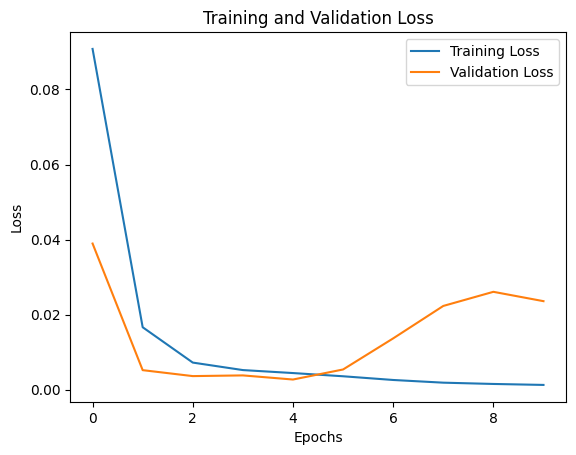

4/4 [==============================] - 70s 16s/step


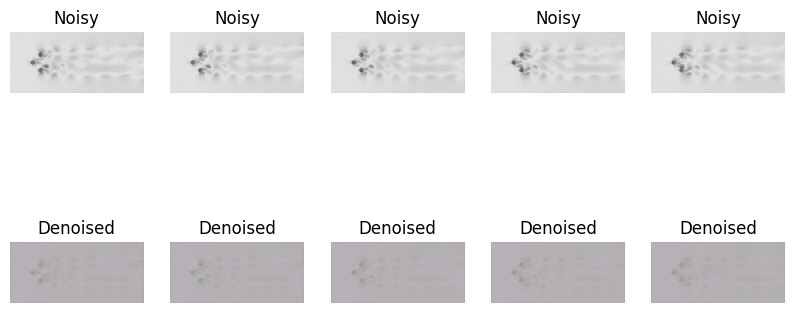

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation

# Load a smaller subset of the dataset
input_folder = "/content/drive/MyDrive/Colab Notebooks/dataset/output_folder/"
clean_images = []
noisy_images = []
for filename in os.listdir(input_folder)[:100]:
    if filename.endswith(".jpg"):
        clean_img = cv2.imread(os.path.join(input_folder, filename))
        noisy_img = clean_img + np.random.normal(0, 0.2 * 0.2 * 255, clean_img.shape).astype(np.uint8)
        clean_images.append(clean_img)
        noisy_images.append(noisy_img)

clean_images = np.array(clean_images) / 255.0
noisy_images = np.array(noisy_images) / 255.0

# Build a simpler model
model = Sequential([
    Conv2D(64, 3, padding='same', input_shape=(None, None, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(3, 3, padding='same', activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(noisy_images, clean_images, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Denoise images
denoised_images = model.predict(noisy_images)

# Plot results
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(noisy_images[i])
    plt.title("Noisy")
    plt.axis("off")
    plt.subplot(2, 5, i + 6)
    plt.imshow(denoised_images[i])
    plt.title("Denoised")
    plt.axis("off")
plt.show()
